<a href="https://colab.research.google.com/github/subbu30122003/bharatintern_ml/blob/main/Iris_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas.plotting
from pandas.plotting import andrews_curves
import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
%matplotlib inline

df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#describing about the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 5)

In [ ]:

#count the value
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
#finding the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

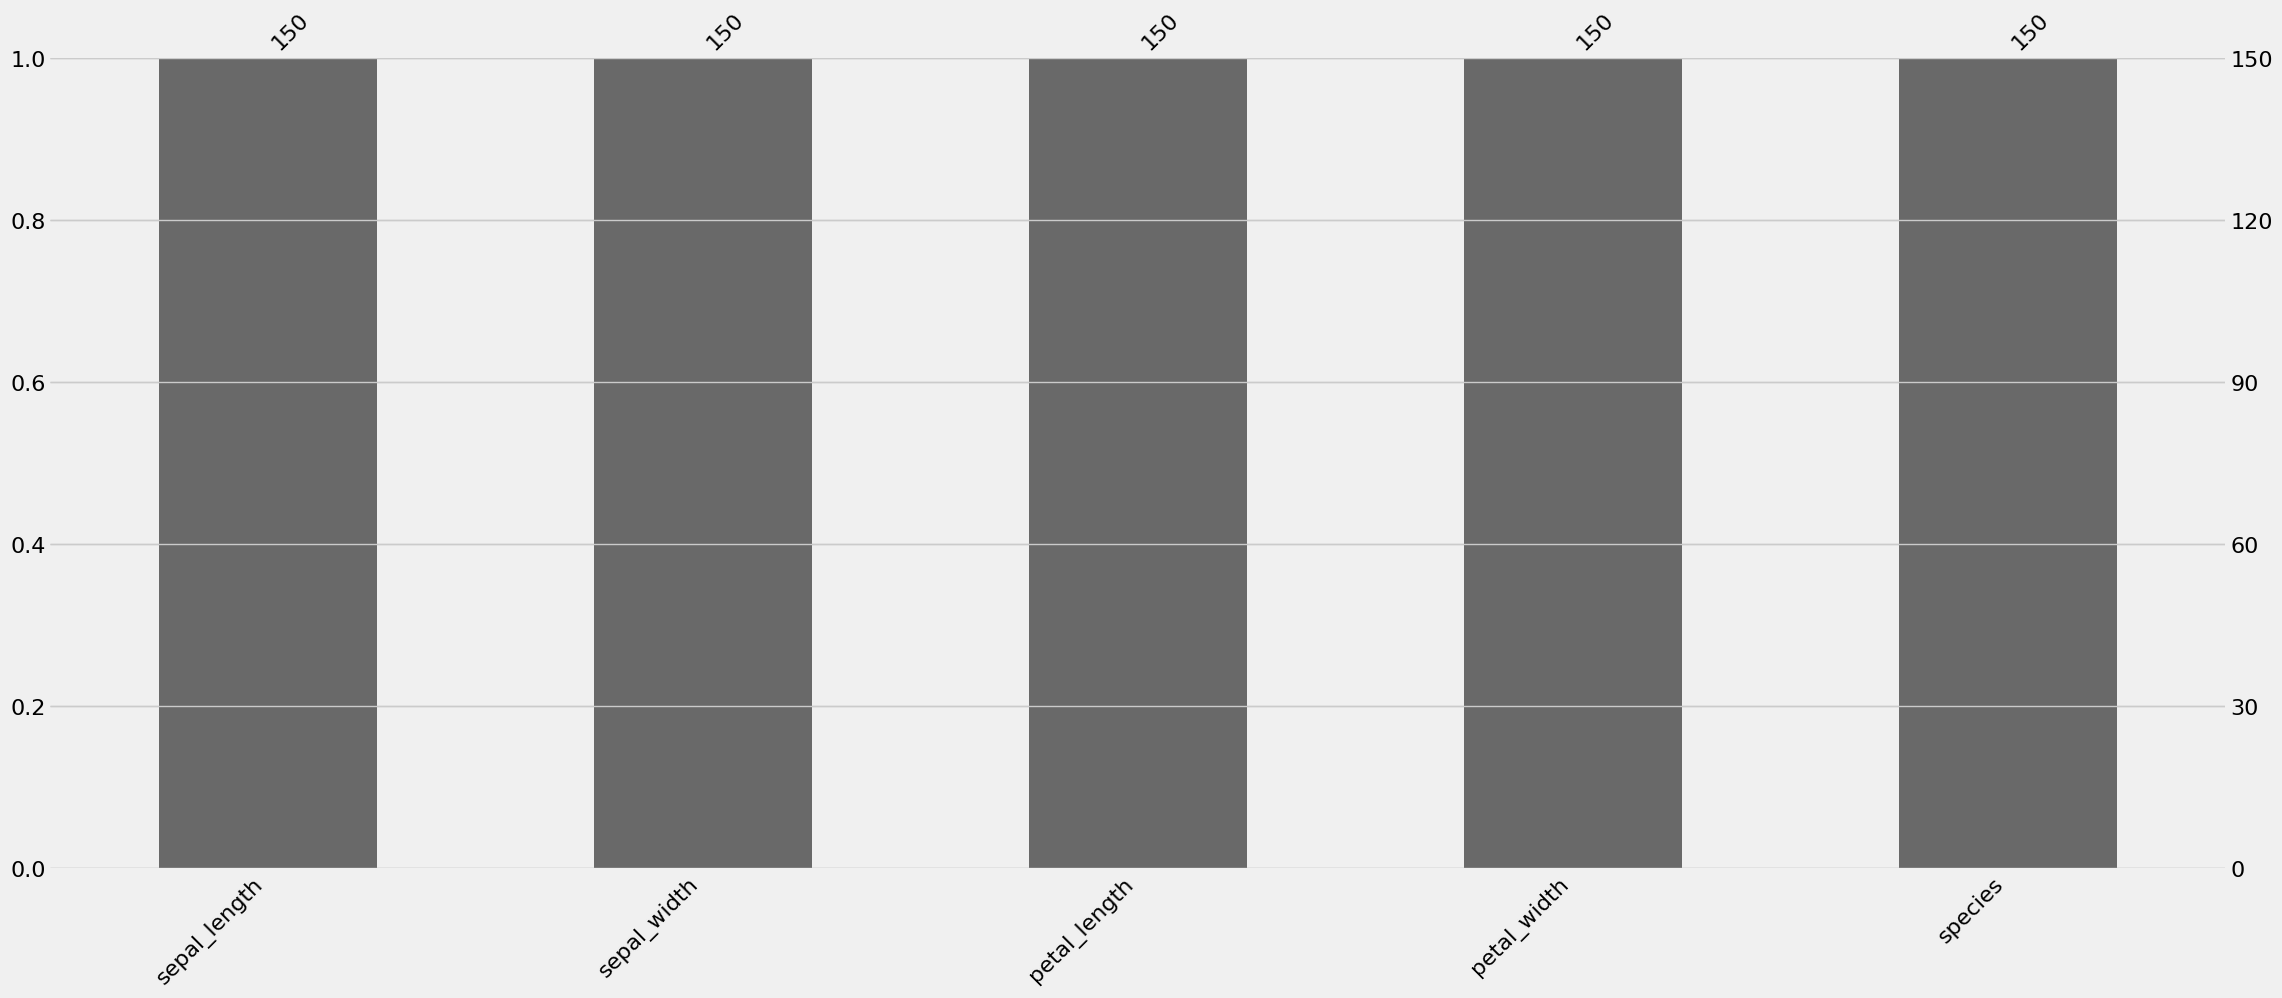

In [ ]:
#visualizing missing data
import missingno as msno
msno.bar(df)

In [ ]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='species', ylabel='sepal_length'>

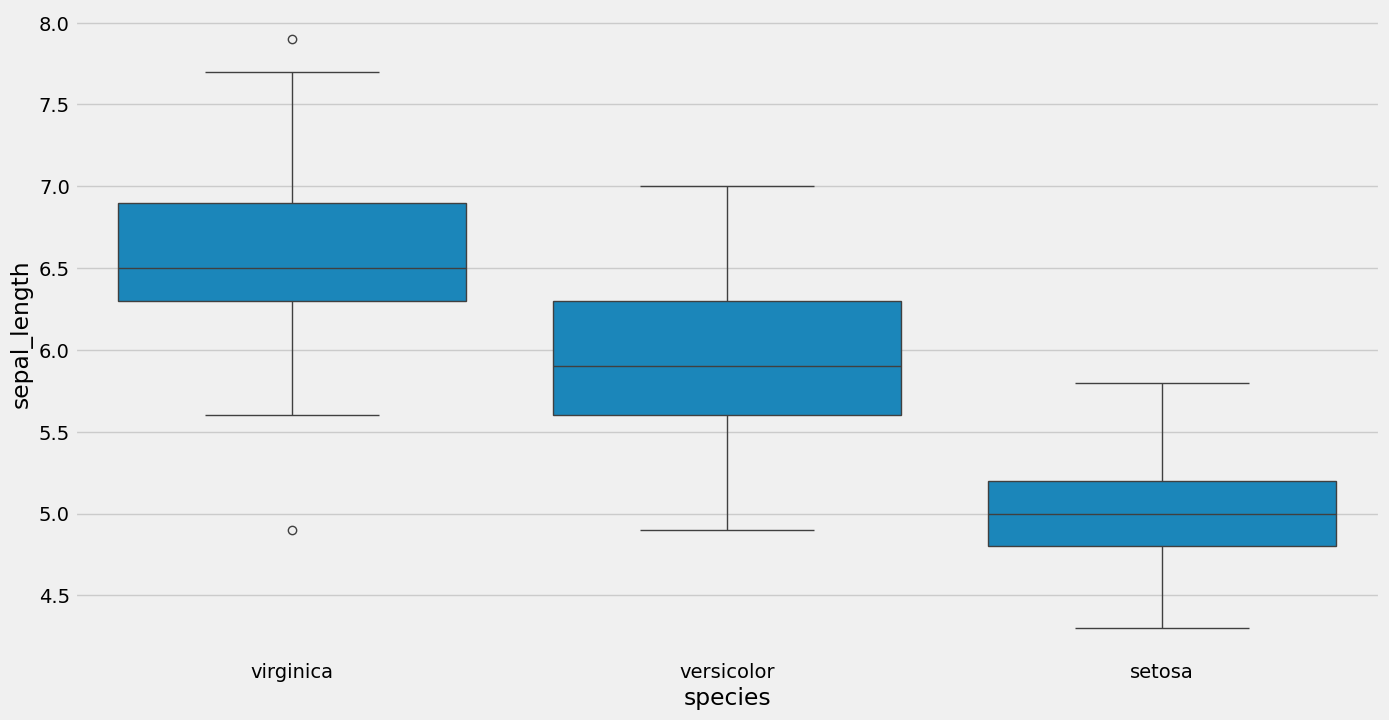

In [ ]:
#Exploratory Data Analysis
# relationship between species and speal length
plt.figure(figsize=(15,8))
sns.boxplot(x="species",y="sepal_length",data=df.sort_values("sepal_length",ascending=False))


<Axes: xlabel='sepal_width', ylabel='sepal_width'>

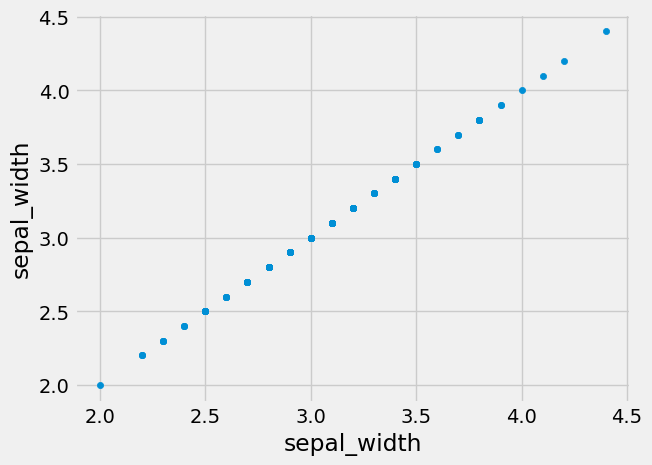

In [ ]:
#relationship between species and sepal width
df.plot(kind='scatter',x='sepal_width',y='sepal_width')

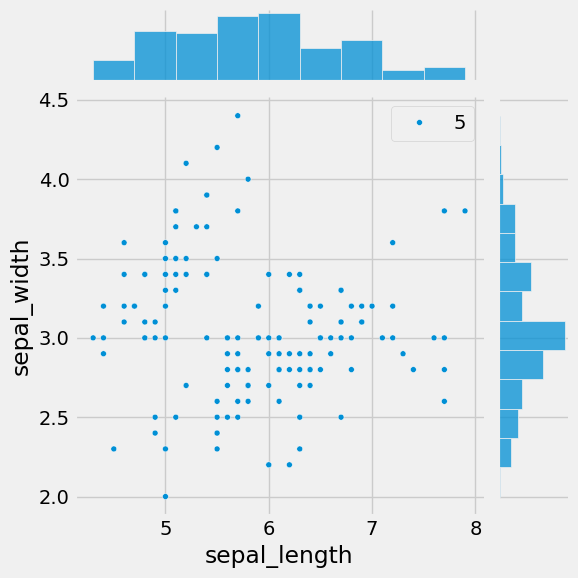

In [ ]:
# Relationship between sepal width and sepal length
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5)

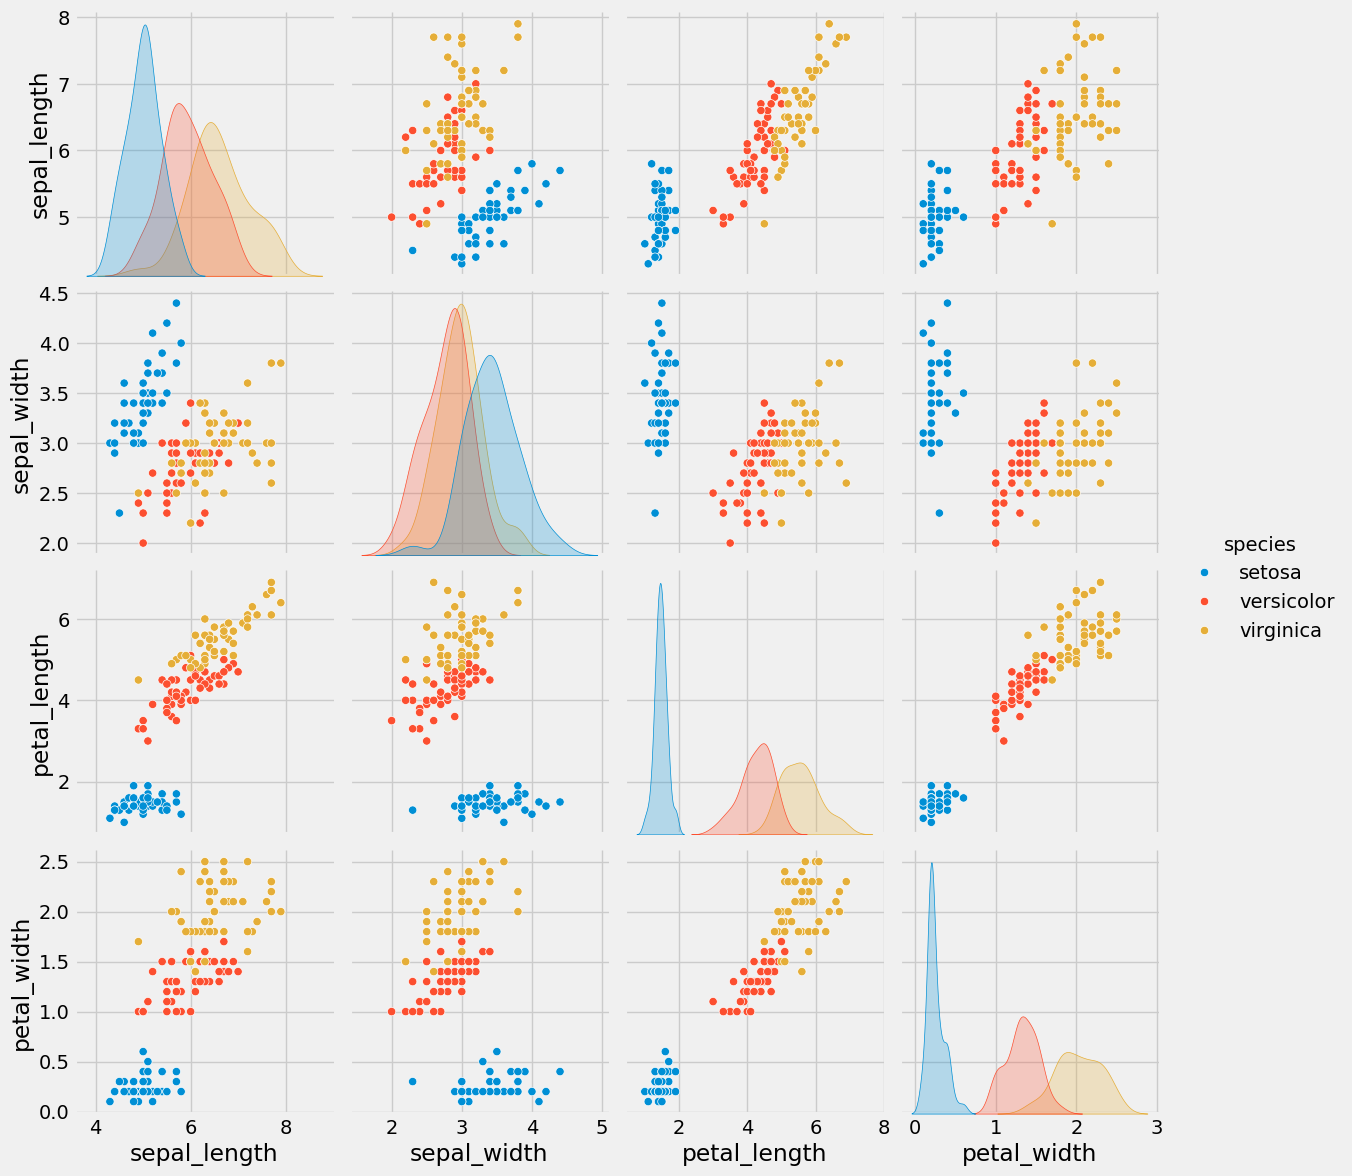

In [ ]:
# pairplot
sns.pairplot(df,hue="species",size=3)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

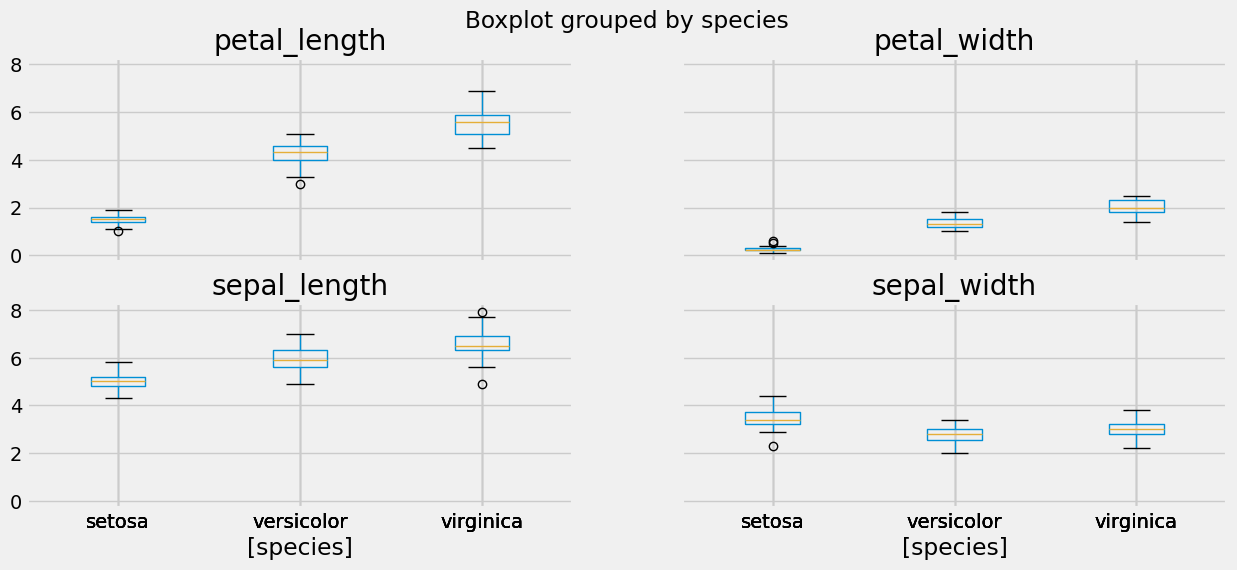

In [ ]:
#Boxplot
df.boxplot(by="species",figsize=(15,6))

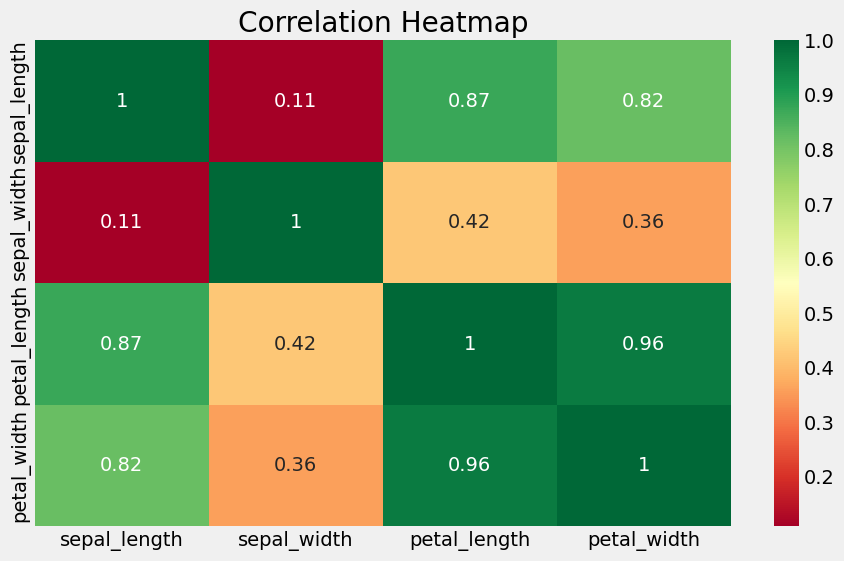

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr().abs(),annot=True,cmap="RdYlGn")
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

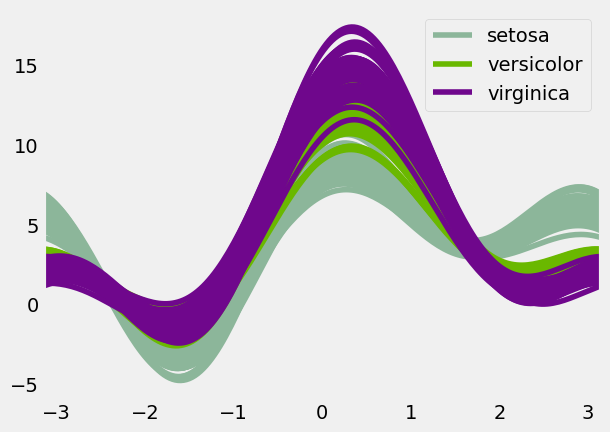

In [ ]:
andrews_curves(df,"species")

<Figure size 1500x1500 with 0 Axes>

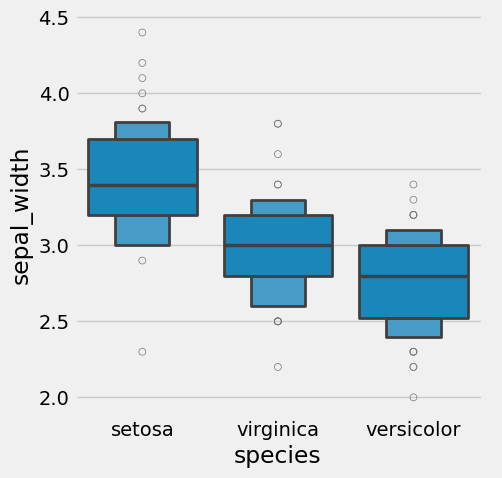

In [ ]:
#Categorical plot
plt.figure(figsize=(15,15))
sns.catplot(x="species",y="sepal_width",data=df.sort_values("sepal_width",ascending=False),kind="boxen")

<Axes: xlabel='species', ylabel='sepal_width'>

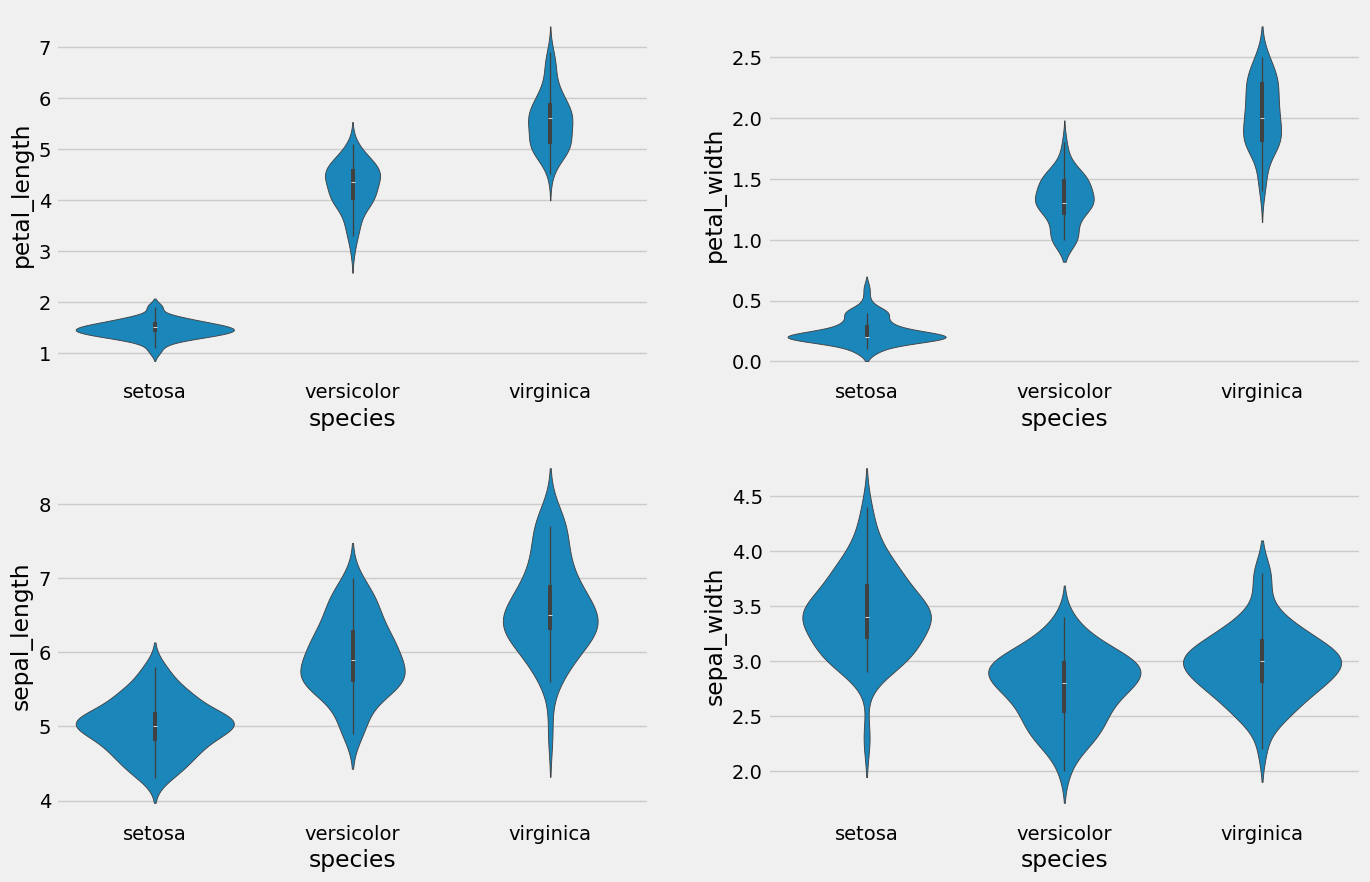

In [ ]:
# Violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

In [ ]:
x=df.drop("species",axis=1)
y=df["species"]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
df["species"]=pd.Categorical(df.species)
df["species"]=df.species.cat.codes
y=to_categorical(df.species)

In [ ]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=123)

In [ ]:
model=Sequential()
model.add(Dense(100,activation="relu",input_shape=(4,)))
model.add(Dense(3,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=45,validation_data=(x_test,y_test))

Epoch 1/45
4/4 [==============================] - 1s 73ms/step - loss: 1.4093 - accuracy: 0.3431 - val_loss: 1.2726 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 17ms/step - loss: 1.1995 - accuracy: 0.3431 - val_loss: 1.1043 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 17ms/step - loss: 1.0512 - accuracy: 0.3431 - val_loss: 1.0191 - val_accuracy: 0.2444
Epoch 4/45
4/4 [==============================] - 0s 13ms/step - loss: 1.0007 - accuracy: 0.3137 - val_loss: 0.9771 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 19ms/step - loss: 0.9670 - accuracy: 0.3333 - val_loss: 0.9479 - val_accuracy: 0.5333
Epoch 6/45
4/4 [==============================] - 0s 18ms/step - loss: 0.9403 - accuracy: 0.5686 - val_loss: 0.9161 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 17ms/step - loss: 0.9103 - accuracy: 0.6569 - val_loss: 0.8838 - val_accuracy: 0.6667
Epoch 8/45
4/4 [===========

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4244 - accuracy: 0.9556


[0.42441949248313904, 0.9555555582046509]

In [ ]:
predict=model.predict(x_test[:10])
predict

1/1 [==============================] - 0s 49ms/step


array([[0.00696152, 0.38538522, 0.6076533 ],
       [0.00600016, 0.3666478 , 0.6273521 ],
       [0.08094498, 0.5668404 , 0.35221452],
       [0.0515394 , 0.52351934, 0.42494133],
       [0.91203046, 0.07048919, 0.01748042],
       [0.05032985, 0.55870926, 0.39096078],
       [0.00663109, 0.31849462, 0.6748743 ],
       [0.00725165, 0.33739048, 0.6553578 ],
       [0.90715   , 0.0756745 , 0.01717555],
       [0.01261276, 0.46321487, 0.5241723 ]], dtype=float32)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
p=np.argmax(predict,axis=1)
print(y_test[:10])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
history.history["accuracy"]

[0.343137264251709,
 0.343137264251709,
 0.343137264251709,
 0.3137255012989044,
 0.3333333432674408,
 0.5686274766921997,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.7254902124404907,
 0.6960784196853638,
 0.6666666865348816,
 0.6666666865348816,
 0.6764705777168274,
 0.7058823704719543,
 0.7843137383460999,
 0.8823529481887817,
 0.8627451062202454,
 0.8529411554336548,
 0.843137264251709,
 0.8235294222831726,
 0.843137264251709,
 0.9117646813392639,
 0.9313725233078003,
 0.9215686321258545,
 0.9313725233078003,
 0.9411764740943909,
 0.9313725233078003,
 0.8725489974021912,
 0.8725489974021912,
 0.9313725233078003,
 0.9215686321258545,
 0.9313725233078003,
 0.9509803652763367,
 0.9509803652763367,
 0.9019607901573181,
 0.9117646813392639,
 0.9313725233078003,
 0.9215686321258545,
 0.9313725233078003,
 0.9411764740943909,
 0.9607843160629272,
 0.9509803652763367,
 0.9411764740943909,
 0.9607843160629272]

In [ ]:
history.history["val_accuracy"]

[0.3333333432674408,
 0.3333333432674408,
 0.24444444477558136,
 0.3333333432674408,
 0.5333333611488342,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6222222447395325,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7333333492279053,
 0.8222222328186035,
 0.8666666746139526,
 0.8222222328186035,
 0.8222222328186035,
 0.7777777910232544,
 0.7777777910232544,
 0.8666666746139526,
 0.9333333373069763,
 0.8888888955116272,
 0.8888888955116272,
 0.9333333373069763,
 0.9333333373069763,
 0.8666666746139526,
 0.8222222328186035,
 0.9555555582046509,
 0.9111111164093018,
 0.9111111164093018,
 0.9333333373069763,
 0.9555555582046509,
 0.8666666746139526,
 0.8222222328186035,
 0.8666666746139526,
 0.8222222328186035,
 0.8888888955116272,
 0.9111111164093018,
 0.9777777791023254,
 0.9111111164093018,
 0.9555555582046509,
 0.9777777791023254,
 0.9555555582046509]

In [ ]:
print("test score:{:2f}".format(np.max(history.history["accuracy"])))

test score:0.960784


In [ ]:
print("test score:{:2f}".format(np.max(history.history["val_accuracy"])))

test score:0.977778


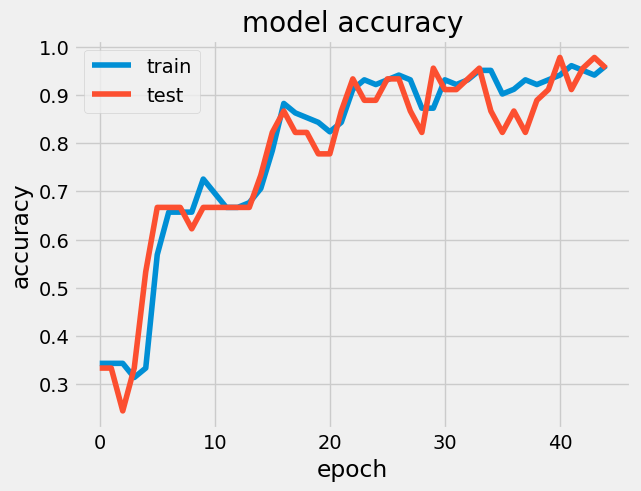

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"])
plt.show()

In [ ]:
print("test score:{:2f}".format(knn.score(x_test,y_test)))

test score:0.933333
